In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox
import math

pd.set_option('future.no_silent_downcasting', True)
pd.options.display.max_colwidth = 140
pd.options.display.width = 140

In [31]:
df = pd.read_csv("results-survey.csv")
print(df)
def nanToZero(number):
    return number if not math.isnan(number) else 0

    Antwort ID    Datum Abgeschickt  Letzte Seite Start-Sprache  Zufallsgeneratorstartwert      Datum gestartet Datum letzte Aktivität  \
0            4  2024-11-04 12:13:22             3            de                  321454653  2024-11-04 12:03:06    2024-11-04 12:13:22   
1            7  2024-11-04 15:00:13             3            de                  840256526  2024-11-04 14:47:40    2024-11-04 15:00:13   
2            9  2024-11-04 15:28:24             3            en                  189992419  2024-11-04 15:18:51    2024-11-04 15:28:24   
3           11  2024-11-04 16:18:31             3            de                 1918282214  2024-11-04 16:09:49    2024-11-04 16:18:31   
4           12  2024-11-04 17:11:32             3            de                 1928093975  2024-11-04 17:04:45    2024-11-04 17:11:32   
5           15  2024-11-04 19:46:41             3            de                  353616940  2024-11-04 19:31:52    2024-11-04 19:46:41   
6           17  2024-11-04 20:12:2

### Statistik: Welche Video- oder Podcast-Bibliotheken nutzen Sie?

                               platform  count
32                              youtube     45
24                              spotify     25
33                        örr mediathek      7
0                          amazon prime      5
1                        apple podcasts      5
18                              netflix      5
2                               audible      4
9                               disney+      2
27                               tiktok      2
30                                vimeo      2
21                         pocket casts      2
10                              dropout      1
4                               castbox      1
3                            bosch tube      1
5                    castro podcast app      1
6                           crunchyroll      1
7                           dailymotion      1
8                                deezer      1
17                               nebula      1
16                            mediathek      1
15           

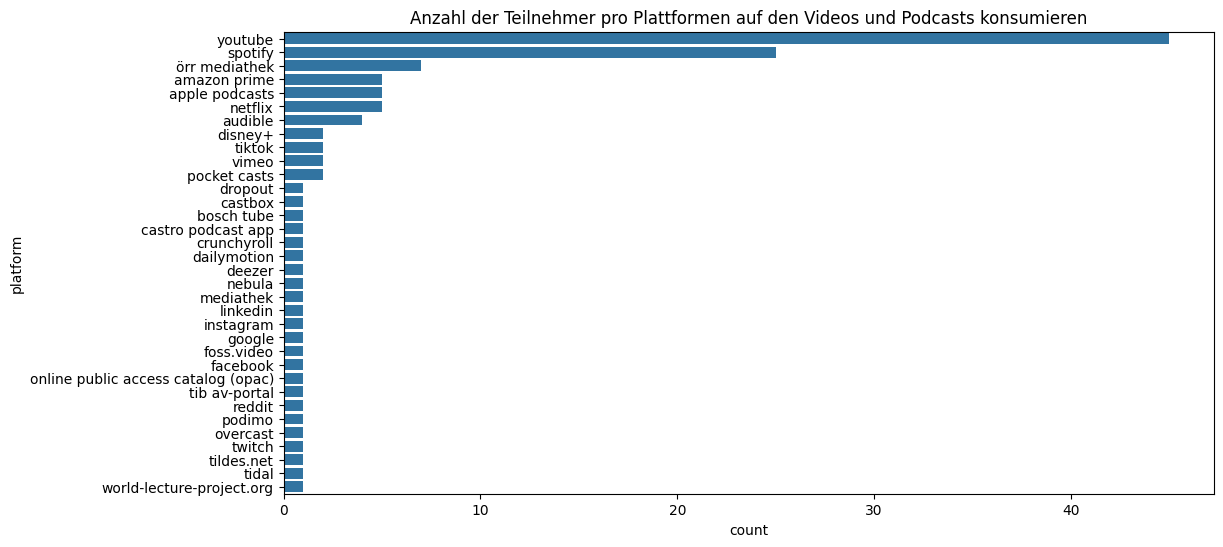

In [7]:
cols = ["Welche Video- oder Podcast-Bibliotheken nutzen Sie?"]

sub_df = df[cols]

def count_cache():
    cache = {}

    def count(value):
        try:
            cache[value] += 1
        except:
            cache[value] = 1

    return cache, count

(cache, do_count) = count_cache()

for value in filter(lambda x: type(x) == str, sub_df[cols[0]]):
    for v in map(lambda x: x.lower().strip(), value.split(", ")):
        do_count(v)

vid_pod_df = pd.DataFrame({"platform": [key for key in sorted(cache.keys())], "count": [ cache[key] for key in sorted(cache.keys())]}).sort_values(by="count", ascending=False)
print(vid_pod_df)
plt.figure(figsize=(12, 6))
sns.barplot(data=vid_pod_df, y="platform", x='count', orient='h')
plt.title('Anzahl der Teilnehmer pro Plattformen auf den Videos und Podcasts konsumieren')
plt.savefig("platformRanking.pdf")
plt.show()


### Statistik: Wissenschaftliche und informative Videos und Podcasts interessiert mich als ...

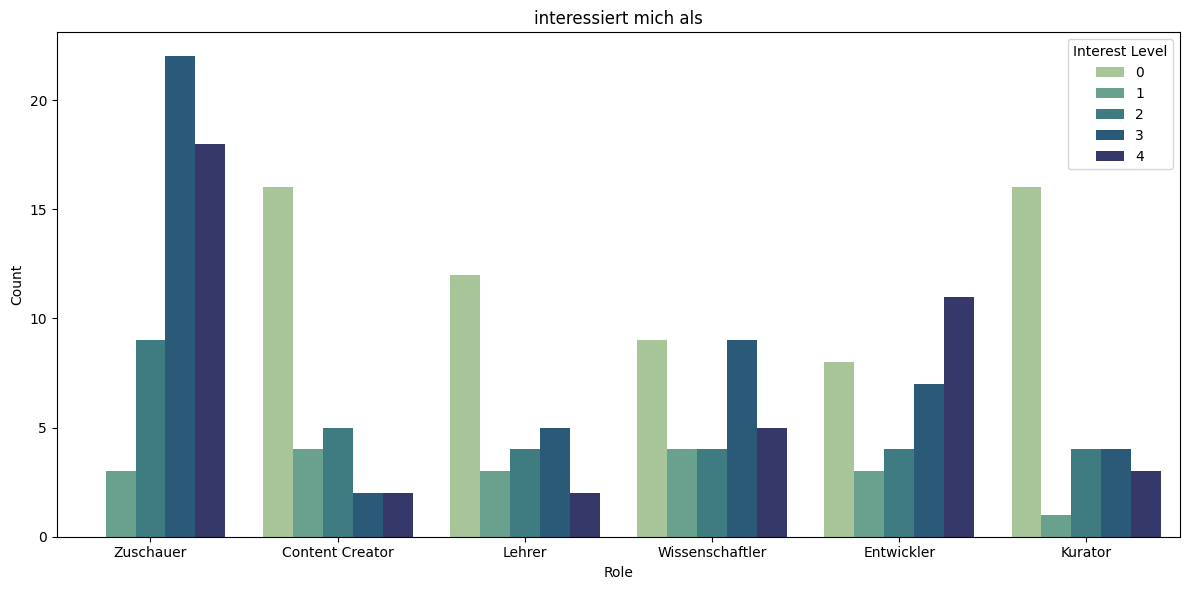

In [12]:
rename_cols = [
    "Wissenschaftliche und informative Videos und Podcasts interessiert mich als ... [Zuschauer]",
    "Wissenschaftliche und informative Videos und Podcasts interessiert mich als ... [Content Creator]",
    "Wissenschaftliche und informative Videos und Podcasts interessiert mich als ... [Lehrer]",
    "Wissenschaftliche und informative Videos und Podcasts interessiert mich als ... [Wissenschaftler]",
    "Wissenschaftliche und informative Videos und Podcasts interessiert mich als ... [Entwickler]",
    "Wissenschaftliche und informative Videos und Podcasts interessiert mich als ... [Kurator]"]

#cols = ["Zuschauer", "Content Creator", "Lehrer", "Wissenschaftler", "Entwickler", "Kurator"]
cols = [ col.split('[').pop()[:-1] for col in rename_cols]
mappingValues = {"Nicht interessant": 0, "Kaum interessant": 1, "Mäßig interessant": 2, "Interessant":3, "Sehr interessant": 4 }
mappingRoles ={ i: col for i, col in enumerate(cols) }
#mappingRoles = { 0: "Zuschauer", 1: "Content Creator", 2: "Wissenschaftler", 3: "Entwickler", 4: "Kurator"}

sub_df = df.replace(mappingValues).loc[:, rename_cols]

sub_df.rename(columns={ rename_cols[i]: cols[i] for i in range(0, len(cols))}, inplace=True)

group_per_category = [sub_df.groupby(col, observed=False).size() for col in cols]

melted_df = pd.DataFrame(group_per_category).reset_index().melt(id_vars='index', var_name='Interest Level', value_name='Count')
melted_df.rename(columns={'index': 'Role'}, inplace=True)
melted_df["Role"] = melted_df["Role"].replace(mappingRoles)

plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x="Role", y='Count', hue='Interest Level', palette='crest')
plt.title('interessiert mich als')
plt.tight_layout()
plt.show()

In [20]:
# Define the labels
def createScaleInteressetPlot(name, title, y_labels, x_labels, marker_positions):
    print(f"y_labels: {y_labels}")
    print(f"x_labels: {x_labels}")
    print(f"marker: {marker_positions}")
    scale_height = 0.5# define scale config
    gap_between_scales = 0.2
    
    # other configs
    offset_plot_box = 0.1
    
    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(8, 3))
    
    # Plot the markers and horizontal lines
    for i, (y, x) in enumerate(zip(y_labels, marker_positions)):
        ax.hlines(i*scale_height, xmin=0, xmax=(len(x_labels)-1), colors='#212121', linestyles='solid')  # Horizontal line
    
    # Add vertical lines for each 'tick' position
    for y in range(len(y_labels)):
        for j in range(len(x_labels)):
            ax.vlines(j, ymin=y*scale_height - (scale_height-gap_between_scales)/ 2, ymax=y*scale_height + (scale_height-gap_between_scales)/ 2, colors='#212121', linestyles='solid')
    
    for i, (y, x) in enumerate(zip(y_labels, marker_positions)):
        print(i, x)
        ax.plot(x, i*scale_height, 'o', markersize=10, color='tab:blue', fillstyle="full")  # Marker in red
    
    # x-ticks positions
    ax.set_xticks([i for i in range(len(x_labels))])
    ax.set_xticklabels(x_labels)
    
    # Set Y-Axis ticks labels
    ax.set_yticks([i * scale_height for i in range(len(y_labels))])
    ax.set_yticklabels(y_labels)
    
    # Set plot limits
    ax.set_xlim(-offset_plot_box, len(x_labels)-1 + offset_plot_box)
    ax.set_ylim(-offset_plot_box - (scale_height-gap_between_scales)/ 2, (len(y_labels) -0.5)*scale_height + offset_plot_box)
    
    # Remove ticks
    ax.tick_params(axis='both', which='both', length=0)
    
    # Remove borders (spines)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    plt.title(title)
    #plt.tight_layout()
    
    plt.savefig(name, bbox_inches="tight")
    # Display the plot
    plt.show()

53
[6]count labels: {3: 3, 2: 6, 0: 24, 1: 18, 5: 1, 4: 1}
y_labels: ['Zuschauer', 'Content Creator', 'Lehrer', 'Wissenschaftler', 'Entwickler', 'Kurator']
x_labels: ['Nicht interessant', 'Kaum interessant', 'Mäßig interessant', 'Interessant', 'Sehr interessant']
marker: [2.7083333333333335, 0.20833333333333334, 0.041666666666666664, 0.2916666666666667, 0.125, 0.0]
0 2.7083333333333335
1 0.20833333333333334
2 0.041666666666666664
3 0.2916666666666667
4 0.125
5 0.0


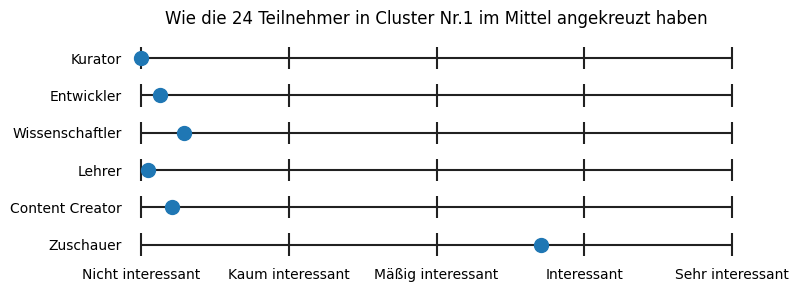

y_labels: ['Zuschauer', 'Content Creator', 'Lehrer', 'Wissenschaftler', 'Entwickler', 'Kurator']
x_labels: ['Nicht interessant', 'Kaum interessant', 'Mäßig interessant', 'Interessant', 'Sehr interessant']
marker: [3.2222222222222223, 0.2777777777777778, 1.1666666666666667, 1.7777777777777777, 3.0555555555555554, 0.16666666666666666]
0 3.2222222222222223
1 0.2777777777777778
2 1.1666666666666667
3 1.7777777777777777
4 3.0555555555555554
5 0.16666666666666666


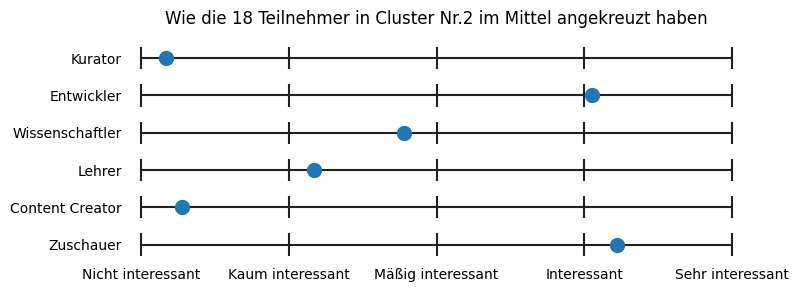

y_labels: ['Zuschauer', 'Content Creator', 'Lehrer', 'Wissenschaftler', 'Entwickler', 'Kurator']
x_labels: ['Nicht interessant', 'Kaum interessant', 'Mäßig interessant', 'Interessant', 'Sehr interessant']
marker: [3.5, 2.1666666666666665, 0.8333333333333334, 0.8333333333333334, 0.16666666666666666, 2.5]
0 3.5
1 2.1666666666666665
2 0.8333333333333334
3 0.8333333333333334
4 0.16666666666666666
5 2.5


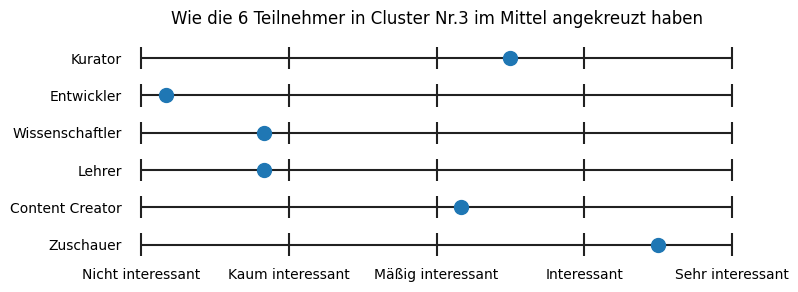

y_labels: ['Zuschauer', 'Content Creator', 'Lehrer', 'Wissenschaftler', 'Entwickler', 'Kurator']
x_labels: ['Nicht interessant', 'Kaum interessant', 'Mäßig interessant', 'Interessant', 'Sehr interessant']
marker: [3.3333333333333335, 0.6666666666666666, 1.0, 3.6666666666666665, 3.0, 2.6666666666666665]
0 3.3333333333333335
1 0.6666666666666666
2 1.0
3 3.6666666666666665
4 3.0
5 2.6666666666666665


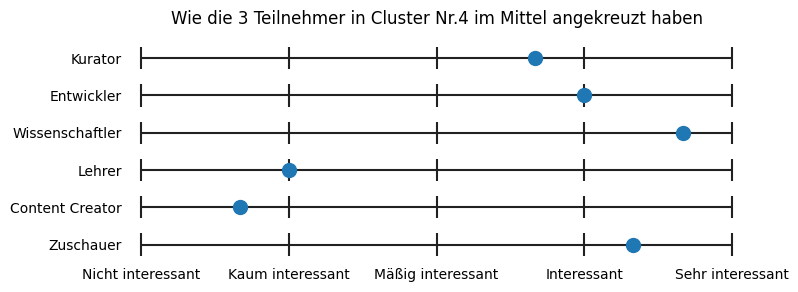

In [28]:
from sklearn.cluster import MeanShift
x = []
for index, row in sub_df.iterrows():
    x.append([row[col] if not np.isnan(row[col]) else 0  for col in cols])

x_np = np.array(x)
print(len(sub_df))
clustering = MeanShift().fit(x_np)

counts = dict()
for cluster_index in clustering.labels_:
    try:
        counts[int(cluster_index)] += 1
    except:
        counts[int(cluster_index)] = 1
print(f"[{len(counts.keys())}]count labels: {counts}") 
filtered_counts = filter(lambda cluster_label: counts[cluster_label] > 2, counts.keys())
counts = { key: counts[key] for key in filtered_counts}
sub_df["cluster_label"] = clustering.labels_

cluster_dfs = [sub_df[sub_df["cluster_label"] == i] for i in range(0, len(counts.keys()))]
cluster_dfs = [cluster_dfs[i].drop("cluster_label", axis=1) for i in range(0, len(counts.keys()))]

def count_clusters(cluster_df):
    cluster_with_counts_df = [cluster_df.groupby(col, observed=False).size() for col in cols]
    melted_cluster_df = pd.DataFrame(cluster_with_counts_df).reset_index().melt(id_vars='index', var_name='Interest Level', value_name='Count')
    melted_cluster_df.rename(columns={'index': 'Role'}, inplace=True)
    melted_cluster_df["Role"] = melted_df["Role"].replace(mappingRoles)
    return melted_cluster_df

# "%1.1f%%"
def autopct(s):
    return lambda percentage: f"{int(percentage * s * 10)/1000} [{int(percentage * 100)/100}%]"

for i in range(0, len(cluster_dfs)):
    count_cluster_df = count_clusters(cluster_dfs[i])
    #print(count_cluster_df)
    #
    scorePerCategory = { col: 0 for col in cols}
    for _, row in count_cluster_df.iterrows():
        scorePerCategory[row["Role"]] += row['Interest Level'] * nanToZero(row["Count"])

    # Idea use this average values on the likert skale to get an impression how this group interest levels are
    scorePerCategory = {key: scorePerCategory[key]/counts[i] for key in scorePerCategory} 
    
    #print(list(scorePerCategory.keys()), "\n", mappingValues.keys(),"\n", scorePerCategory.values())
    
    #s = sum(scorePerCategory.values())
    #sns.set_style("whitegrid")
    #plt.figure(figsize=(6,6))
    #plt.pie(scorePerCategory.values(), labels=scorePerCategory.keys(), autopct=autopct(s))
    #plt.title(f"Cluster Nr.{i}, n = {counts[i]}, points_sum = {s}")
    #plt.savefig(f"Pie_Chart_Cluster_nr_{i}_n_{counts[i]}.pdf")
    #plt.show()
    #
    createScaleInteressetPlot(f"Cluster_{i}_n_{counts[i]}_scale.pdf", f"Wie die {counts[i]} Teilnehmer in Cluster Nr.{i+1} im Mittel angekreuzt haben", list(scorePerCategory.keys()), list(mappingValues.keys()), list(scorePerCategory.values()))    
    """
    plt.figure(figsize=(6, 3))
    sns.barplot(data=count_cluster_df, x="Role", y='Count', hue='Interest Level', palette='crest')
    plt.title(f'Cluster Nr.{i}, n={counts[i]}')
    plt.tight_layout()
    plt.savefig(f"Cluster_{i}_n_{counts[i]}.pdf")
    plt.show()
    """

### Statistik: Unser Ziel ist es, Ihnen und anderen Nutzer einfachen Zugang zu vertrauenswürdigen Bildungsinhalten zu bieten und die Qualität solcher Inhalte zu fördern.  Die Plattform soll bei den folgenden Aufgaben unterstützen. Ordnen Sie die Aufgaben, wie sie für Sie persönlich wichtig sind.  [Rank 1-4]

In [ ]:
original_col_name = "Unser Ziel ist es, Ihnen und anderen Nutzer einfachen Zugang zu vertrauenswürdigen Bildungsinhalten zu bieten und die Qualität solcher Inhalte zu fördern.  Die Plattform soll bei den folgenden Aufgaben unterstützen. Ordnen Sie die Aufgaben, wie sie für Sie persönlich wichtig sind.  [Rank {}]"
original_cols = [ original_col_name.format(i) for i in range(1, 5)]
cols = [ f"Rank {i}" for i in range(1,5)]

original_categories = ["Finden.z.B. Den richtigen Podcast für Ihre Fragen finden.", "Diskutierten.z.B. Theorien mit Argumenten aus Videos stützen und offene Punkte diskutieren.", "Vergleichen.z.B. Aussagen aus verschiedenen Videos und Podcasts in einer Übersicht zeigen.", "Kuratieren.z.B. Videos nach Thema, Sprache oder Bildungslevel sortieren."]
categories = ["Finden", "Diskutierten", "Vergleichen", "Kuratieren"]

sub_df = df[original_cols].replace({original_categories[i]: categories[i] for i in range(0, len(categories))})
sub_df = sub_df.rename(columns={ original_cols[i]: cols[i] for i in range(0, len(cols))} )
ranks_counts_dfs = [ sub_df[col].value_counts().rename(col) for col in cols ]

merged_rank_df = pd.DataFrame(ranks_counts_dfs).reset_index()
merged_rank_df = merged_rank_df.melt(id_vars='index', var_name='Category', value_name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(data=merged_rank_df, x="Category", y='Count', hue='index', palette='crest_r')
plt.title(f'Aufgaben wichtigkeit')
plt.tight_layout()
plt.show()


In [ ]:
# average rank
def avg_rank_by_category(group):
    return 

avg_ranks = merged_rank_df.groupby("Category")[["Count"]].agg(lambda group: sum([value * index for value, index in zip(group, range(1, len(group)+1))]) / sum([value for value in group]))
print(avg_ranks.sort_values("Count"))

# box plot + count n ranked it
# centered stacked bar chart
# export to svg, png, pdf
# nan in plot inkludieren, als nicht angegeben

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_ranks.sort_values("Count"), x="Category", y='Count')
plt.title(f'Avg Rank per Task')
plt.tight_layout()
plt.show()

In [ ]:
original_columns = """Um diese Ziele zu erreichen, planen wir verschiedene Funktionen für die Plattform zu entwickeln. Welche dieser Funktionen interessieren Sie persönlich?  [Medien nach Kategorien filtern.z.B.  Thema, Bildungslevel, Autor, Gäste, ...]	
Um diese Ziele zu erreichen, planen wir verschiedene Funktionen für die Plattform zu entwickeln. Welche dieser Funktionen interessieren Sie persönlich?  [Videos und Podcasts finden und nachlesen.z.B. anhand von duchsuchbaren Transkripten]
Um diese Ziele zu erreichen, planen wir verschiedene Funktionen für die Plattform zu entwickeln. Welche dieser Funktionen interessieren Sie persönlich?  [Ähnliche Videos &amp; Podcasts finden.z.B. gleiches Bildungslevel, aber anderes Thema]
Um diese Ziele zu erreichen, planen wir verschiedene Funktionen für die Plattform zu entwickeln. Welche dieser Funktionen interessieren Sie persönlich?  [Informationen ergänzen.z.B. Nutzer können eine Zusammenfassung für ein Video schreiben]
Um diese Ziele zu erreichen, planen wir verschiedene Funktionen für die Plattform zu entwickeln. Welche dieser Funktionen interessieren Sie persönlich?  [Informationen extrahieren.z.B. Transkript, Untertitel]
Um diese Ziele zu erreichen, planen wir verschiedene Funktionen für die Plattform zu entwickeln. Welche dieser Funktionen interessieren Sie persönlich?  [Informationen übersetzen.insbesondere Transkripte]
Um diese Ziele zu erreichen, planen wir verschiedene Funktionen für die Plattform zu entwickeln. Welche dieser Funktionen interessieren Sie persönlich?  [Texte verlinken.z.B. Wörter innerhalb eines Transkipts verlinkt auf Wikipedia oder anderen Webseiten]
Um diese Ziele zu erreichen, planen wir verschiedene Funktionen für die Plattform zu entwickeln. Welche dieser Funktionen interessieren Sie persönlich?  [Texte kollaborativ verbessern.z.B. Nutzer können die Rechtschreibung, Übersetzungen von Transkripten gemeinsam korrigieren]
Um diese Ziele zu erreichen, planen wir verschiedene Funktionen für die Plattform zu entwickeln. Welche dieser Funktionen interessieren Sie persönlich?  [Inhalte analysieren und aufbereiten.z.B. die Plattform unterstützt Argumente und Schlüsselbegriffe in Transkripten zu identifizieren]
Um diese Ziele zu erreichen, planen wir verschiedene Funktionen für die Plattform zu entwickeln. Welche dieser Funktionen interessieren Sie persönlich?  [Inhalte zitieren oder teilen.z.B. Nutzer können ganze Videos &amp; Podcasts, aber auch spezifische Zitate teilen]
Um diese Ziele zu erreichen, planen wir verschiedene Funktionen für die Plattform zu entwickeln. Welche dieser Funktionen interessieren Sie persönlich?  [Daten der Plattform mit anderen Systemen vernküpfen.z.B. Wikipedia etc., Lernplatformen wie eDoer, ...]
Um diese Ziele zu erreichen, planen wir verschiedene Funktionen für die Plattform zu entwickeln. Welche dieser Funktionen interessieren Sie persönlich?  [Forschungsdaten teilen.z.B. Mess-Daten, Analysen, Erkenntnisse die im Video verwendet wurden]
Um diese Ziele zu erreichen, planen wir verschiedene Funktionen für die Plattform zu entwickeln. Welche dieser Funktionen interessieren Sie persönlich?  [Faktenchecks unterstützen.z.B. Nutzer können gemeinsam Talkshows, Podiums-Diskussionen etc. aufbereiten]
Um diese Ziele zu erreichen, planen wir verschiedene Funktionen für die Plattform zu entwickeln. Welche dieser Funktionen interessieren Sie persönlich?  [Strukturierte Diskussionen stützen.z.B. Teilen von Definitionen, Argumente und Thesen aus Podcasts mit anderen Nutzern]
Um diese Ziele zu erreichen, planen wir verschiedene Funktionen für die Plattform zu entwickeln. Welche dieser Funktionen interessieren Sie persönlich?  [Bias und Logische Fehlschlüsse erkennen.z.B. Medien werden makiert, wenn sie "Falsche Gleichgewichtung" oder "Verwechslung von Begründung und Korrelation" enthalten]	
Um diese Ziele zu erreichen, planen wir verschiedene Funktionen für die Plattform zu entwickeln. Welche dieser Funktionen interessieren Sie persönlich?  [Zeit &amp; Nerven schonen.z.B. mit wiederverwendbaren Antworten auf häufig gestellte Fragen]""".split('\n')
original_columns = [ col.strip() for col in original_columns]
columns = [ col.replace("Um diese Ziele zu erreichen, planen wir verschiedene Funktionen für die Plattform zu entwickeln. Welche dieser Funktionen interessieren Sie persönlich?", "").replace("&amp;", "&").replace("  ", " ").strip() for col in original_columns]
columns = [ col.split("[")[1].split(".z.B.")[0][:50] for col in columns]
#columns = [ f"[{col[1:-1][:70]}{"..." if len(col) > 70 else ""}]" for col in columns ]
categoriesMap = { "Nicht wichtig": 5, "Kaum wichtig": 4, "Mäßig wichtig": 3 ,"Wichtig": 2, "Sehr wichtig": 1 }
categories = list(categoriesMap.keys())

for i in range(len(columns)):
    if columns[i] == "Informationen übersetzen.insbesondere Transkripte]":
        columns[i] = "Informationen übersetzen, insbesondere Transkripte"

sub_df = df[original_columns].rename(columns={ original_columns[i]: columns[i] for i in range(0, len(columns))})

def get_avg(col):
    values = sub_df[col].dropna()
    return sum([ categoriesMap[value] for value in values]) / len(values)

def count_per_catgory(col, category):
    cache, count = count_cache()
    for value in sub_df[col].dropna():
        count(value)
    try:
        return cache[category]
    except:
        return 0

def statistics_avg_ranking(sub_df, title):
    _columns = sub_df.columns
    var_list = list(map(lambda col: np.var([ categoriesMap[value] for value in sub_df[col].dropna() ]), _columns))
    std_list = [ math.sqrt(var) for var in var_list]
    avg_feature_df = pd.DataFrame({
        "feature": _columns,
        "avg_rank": list(map(lambda col: get_avg(col), _columns)),
        "var": var_list,
        "std": std_list,
        **{ category: [ count_per_catgory(col, category) for col in _columns] for category in reversed(categories) }
    }).sort_values("avg_rank")
    print(avg_feature_df)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=avg_feature_df, x="avg_rank", y='feature', orient='h')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# centered stacked bar chart
#mapped_sub_df = sub_df.replace(categoriesMap)
# print(mapped_sub_df)
#sns.boxplot(data=mapped_sub_df, orient="h", color="blue")
#statistics_avg_ranking(sub_df, f'Avg Rank per Feature')

In [ ]:
from functools import reduce

def count_per_catgory_ary(col):
    def try_get_or_zero(cache, key):
        try:
            return cache[key]
        except:
            return 0
    
    cache, count = count_cache()
    for value in sub_df[col].dropna():
        count(value)
    return [try_get_or_zero(cache, key) for key in categories ]


def survey(results, category_names, category_scores):
    """
    https://stackoverflow.com/questions/23142358/create-a-diverging-stacked-bar-chart-in-matplotlib
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*. The order is assumed
        to be from 'Strongly disagree' to 'Strongly aisagree'
    category_names : list of str
        The category labels.
    """
    def get_avg(col):
        return sum([ c * category_scores[category] for c, category in zip(results[col], category_names)]) / sum(results[col])
    
    avg_dict = { col: avg for col, avg in zip(results.keys(), list(map(lambda col: get_avg(col), results.keys())))}
    ordered_avg_dict = dict(sorted(avg_dict.items(), key=lambda item: item[1]))
    results = { key: results[key] for key in ordered_avg_dict}
    
    
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    middle_index = data.shape[1]//2
    offsets = data[:, range(middle_index)].sum(axis=1) + data[:, middle_index]/2
    
    # Color Mapping
    category_colors = plt.get_cmap('coolwarm_r')(
        np.linspace(0.15, 0.85, data.shape[1]))
    
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Plot Bars
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths - offsets
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color, )
        for width, start, height, label in zip(widths, starts, [ 1 * i + 0.04 for i in range(len(widths))], labels):
            if(width > 0):
                ax.text(start + width - 0.25, height, width, ha='right', va='center', fontsize=9)
            
            
    # Add Zero Reference Line
    ax.axvline(0, linestyle='--', color='black', alpha=.25)
    
    # X Axis
    ax.set_xlim(-30, 50)
    ax.set_xticks(np.arange(-30, 60, 10))
    ax.xaxis.set_major_formatter(lambda x, pos: str(abs(int(x))))
    
    # Y Axis
    ax.invert_yaxis()
    
    # Remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    
    # Ledgend
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize=7.5)
    
    # Set Background Color
    fig.set_facecolor('#FFFFFF')

    return fig, ax


category_names = categories
results ={ col: count_per_catgory_ary(col) for col in columns }
fig, ax = survey(results, category_names, categoriesMap)
plt.tight_layout()
#plt.savefig("FeaturesRanking.pdf")
plt.show()


In [ ]:
original_columns = """Viele unterschiedliche Kriterien existieren, um Videos und Podcasts zu filtern. Welche sind Ihnen wichtig? [Thema ]
Viele unterschiedliche Kriterien existieren, um Videos und Podcasts zu filtern. Welche sind Ihnen wichtig? [Komplexität / Bildungsniveau]
Viele unterschiedliche Kriterien existieren, um Videos und Podcasts zu filtern. Welche sind Ihnen wichtig? [Richtigkeit]
Viele unterschiedliche Kriterien existieren, um Videos und Podcasts zu filtern. Welche sind Ihnen wichtig? [Länge]
Viele unterschiedliche Kriterien existieren, um Videos und Podcasts zu filtern. Welche sind Ihnen wichtig? [Finanzierung]
Viele unterschiedliche Kriterien existieren, um Videos und Podcasts zu filtern. Welche sind Ihnen wichtig? [Veröffentlichungsdatum]
Viele unterschiedliche Kriterien existieren, um Videos und Podcasts zu filtern. Welche sind Ihnen wichtig? [Sprache]
Viele unterschiedliche Kriterien existieren, um Videos und Podcasts zu filtern. Welche sind Ihnen wichtig? [Anzahl Likes / Dislikes]
Viele unterschiedliche Kriterien existieren, um Videos und Podcasts zu filtern. Welche sind Ihnen wichtig? [Anzahl Aufrufe]
Viele unterschiedliche Kriterien existieren, um Videos und Podcasts zu filtern. Welche sind Ihnen wichtig? [Anzahl Kanal-Abonnenten]
Viele unterschiedliche Kriterien existieren, um Videos und Podcasts zu filtern. Welche sind Ihnen wichtig? [Bildungs-Hintergrund des Channel-Teams / Sprechers]
Viele unterschiedliche Kriterien existieren, um Videos und Podcasts zu filtern. Welche sind Ihnen wichtig? [Empfehlungen von Freunden / Kuratoren]
Viele unterschiedliche Kriterien existieren, um Videos und Podcasts zu filtern. Welche sind Ihnen wichtig? [Hat Transkript (Ja/Nein)]
Viele unterschiedliche Kriterien existieren, um Videos und Podcasts zu filtern. Welche sind Ihnen wichtig? [Hat Quellen/Referenzen (Ja/Nein)]""".split('\n')
original_columns = [ col.strip() for col in original_columns]
columns = [ col.replace("Viele unterschiedliche Kriterien existieren, um Videos und Podcasts zu filtern. Welche sind Ihnen wichtig?", "").replace("  ", " ").strip() for col in original_columns]
columns = [ f"[{col[1:-1][:70]}{"..." if len(col) > 70 else ""}]" for col in columns ]

sub_df = df[original_columns].rename(columns={ original_columns[i]: columns[i] for i in range(0, len(columns))})
#statistics_avg_ranking(sub_df, f'Avg rank per Filter Criteria')

results = { col: count_per_catgory_ary(col) for col in columns }

fig, ax = survey(results, category_names, categoriesMap)
plt.tight_layout()
#plt.savefig("CriteriaRanking.pdf")
plt.show()

In [ ]:
ax = sns.boxplot(x=df["Gesamtzeit"])
ax.set(xlabel="Gesamtzeit in Sekunden", ylabel="Teilnehmer", title="Bearbeitungsdauer des Surveys")


# Output the boxplot values
print("Boxplot values:")
print(f"  Quartiles: {np.percentile(df['Gesamtzeit'], [25, 50, 75])}")  # We'll use numpy percentile for quartiles
print(f"  Median: {df["Gesamtzeit"].median()}")

plt.show()

In [ ]:
rename_cols = [
    "Wissenschaftliche und informative Videos und Podcasts interessiert mich als ... [Zuschauer]",
    "Wissenschaftliche und informative Videos und Podcasts interessiert mich als ... [Content Creator]",
    "Wissenschaftliche und informative Videos und Podcasts interessiert mich als ... [Wissenschaftler]",
    "Wissenschaftliche und informative Videos und Podcasts interessiert mich als ... [Entwickler]",
    "Wissenschaftliche und informative Videos und Podcasts interessiert mich als ... [Kurator]"]
cols = ["Zuschauer", "Content Creator", "Wissenschaftler", "Entwickler", "Kurator"]
mappingValues = {"Nicht interessant": 0, "Kaum interessant": 1, "Mäßig interessant": 2, "Interessant":3, "Sehr interessant": 4 }
mappingRoles = { 0: "Zuschauer", 1: "Content Creator", 2: "Wissenschaftler", 3: "Entwickler", 4: "Kurator"}

sub_df = df.replace(mappingValues).loc[:, rename_cols]

sub_df.rename(columns={ rename_cols[i]: cols[i] for i in range(0, len(cols))}, inplace=True)

group_per_category = [sub_df.groupby(col, observed=False).size() for col in cols]

melted_df = pd.DataFrame(group_per_category).reset_index().melt(id_vars='index', var_name='Interest Level', value_name='Count')
melted_df.rename(columns={'index': 'Role'}, inplace=True)
melted_df["Role"] = melted_df["Role"].replace(mappingRoles)

results = { col: [ int(nanToZero(melted_df[(melted_df["Role"] == col) & (melted_df["Interest Level"] == i)]["Count"].iloc[0])) for i in range(0,5)] for col in cols }

fig, ax = survey(results, list(mappingValues.keys()) , { key: 5 - mappingValues[key] for key in mappingValues.keys()})
plt.tight_layout()
plt.savefig("StakeholderInterests.pdf")
plt.show()